# Regressão Linear e Regressão Logística

## Regressão Linear

A regressão linear é uma forma utilizada em logística e estatística para estabelecer uma função que permita estimar um valor de um dado com base em outro dado correlacionado a partir de uma análise inicial nos dados. E pode ser representada matematicamente pela formula na figura abaixo 
![Imagem1](RegressaoLinearFormula.png)

### To do

[ ] Explicar sobre Regressão Linear  
[ ] Explicar sobre Regressão Logistica 
[ ] Escolher um dataset para trabalhar 
[ ] Aplicar a regressão para prever um dado valor. 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('traffic_violaions.csv')
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [101]:
df.drop("country_name",axis=1,inplace=True)
df.drop("search_type",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   driver_gender       49580 non-null  object 
 3   driver_age_raw      49588 non-null  float64
 4   driver_age          49346 non-null  float64
 5   driver_race         49581 non-null  object 
 6   violation_raw       49581 non-null  object 
 7   violation           49581 non-null  object 
 8   search_conducted    52965 non-null  object 
 9   stop_outcome        49581 non-null  object 
 10  is_arrested         49581 non-null  object 
 11  stop_duration       49581 non-null  object 
 12  drugs_related_stop  52965 non-null  object 
dtypes: float64(2), object(11)
memory usage: 5.3+ MB


In [102]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49340 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           49340 non-null  object 
 1   stop_time           49340 non-null  object 
 2   driver_gender       49340 non-null  object 
 3   driver_age_raw      49340 non-null  float64
 4   driver_age          49340 non-null  float64
 5   driver_race         49340 non-null  object 
 6   violation_raw       49340 non-null  object 
 7   violation           49340 non-null  object 
 8   search_conducted    49340 non-null  object 
 9   stop_outcome        49340 non-null  object 
 10  is_arrested         49340 non-null  object 
 11  stop_duration       49340 non-null  object 
 12  drugs_related_stop  49340 non-null  object 
dtypes: float64(2), object(11)
memory usage: 5.3+ MB


In [103]:
df.describe()

,driver_age_raw,driver_age
count,49340.000000,49340.000000
mean,1973.857337,34.172254
std,12.757459,12.770223
min,1918.000000,15.000000
25%,1965.000000,23.000000
50%,1977.000000,31.000000
75%,1985.000000,43.000000
max,1995.000000,88.000000


In [104]:
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,10/4/2011,22:22,M,1979.0,32.0,White,Speeding,Speeding,False,Arrest Driver,True,0-15 Min,False
52958,10/4/2011,22:36,F,1967.0,44.0,Hispanic,Speeding,Speeding,False,Citation,False,0-15 Min,False
52959,10/4/2011,23:25,F,1991.0,20.0,Black,Speeding,Speeding,False,Citation,False,0-15 Min,False
52962,10/5/2011,6:43,M,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


<AxesSubplot:xlabel='driver_gender', ylabel='count'>

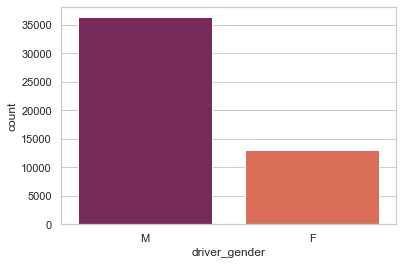

In [105]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.countplot(x = df['driver_gender'], palette='rocket')

<AxesSubplot:xlabel='driver_age', ylabel='count'>

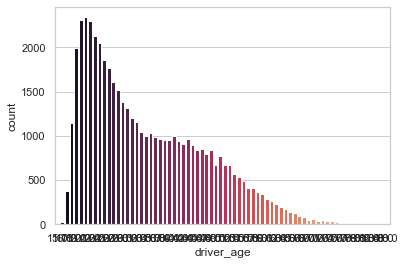

In [106]:
sns.countplot(x = df['driver_age'], palette='rocket')

<AxesSubplot:xlabel='driver_race', ylabel='count'>

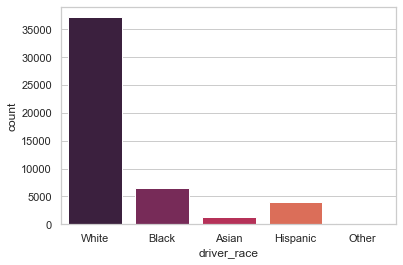

In [107]:
sns.countplot(x = df['driver_race'], palette='rocket')

<AxesSubplot:xlabel='violation', ylabel='count'>

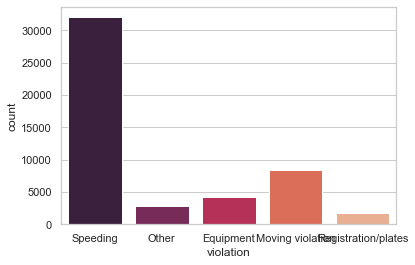

In [108]:
sns.countplot(x = df['violation'], palette='rocket')

<AxesSubplot:xlabel='drugs_related_stop', ylabel='count'>

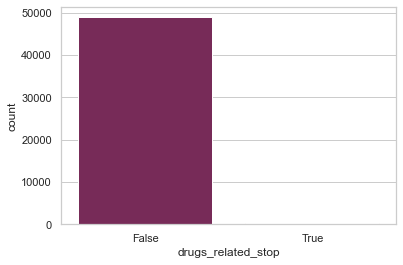

In [109]:
sns.countplot(x = df['drugs_related_stop'], palette='rocket')

<AxesSubplot:xlabel='violation', ylabel='drugs_related_stop'>

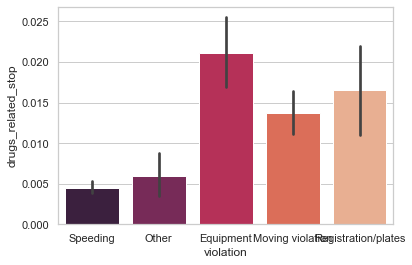

In [12]:
sns.barplot(x=df['violation'], y = df['drugs_related_stop'], palette='rocket')

Observados os dados que serão utilizados, é possível remover as colunas que não são de interesse.

In [110]:
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,10/4/2011,22:22,M,1979.0,32.0,White,Speeding,Speeding,False,Arrest Driver,True,0-15 Min,False
52958,10/4/2011,22:36,F,1967.0,44.0,Hispanic,Speeding,Speeding,False,Citation,False,0-15 Min,False
52959,10/4/2011,23:25,F,1991.0,20.0,Black,Speeding,Speeding,False,Citation,False,0-15 Min,False
52962,10/5/2011,6:43,M,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [111]:
df.drop('search_conducted', axis = 1, inplace = True)
df.drop('stop_outcome', axis = 1, inplace = True)
df.drop('is_arrested', axis = 1, inplace = True)
df.drop('stop_duration', axis = 1, inplace = True)
df.drop('drugs_related_stop', axis = 1, inplace = True)
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding
...,...,...,...,...,...,...,...,...
52956,10/4/2011,22:22,M,1979.0,32.0,White,Speeding,Speeding
52958,10/4/2011,22:36,F,1967.0,44.0,Hispanic,Speeding,Speeding
52959,10/4/2011,23:25,F,1991.0,20.0,Black,Speeding,Speeding
52962,10/5/2011,6:43,M,1986.0,25.0,White,Speeding,Speeding


Enfim, com apenas as colunas necessarias, podemos realizar a codificação dos dados categoricos.

In [112]:
df['driver_gender'].value_counts()

M    36355
F    12985
Name: driver_gender, dtype: int64

In [113]:
df['driver_race'].value_counts()

White       37196
Black        6552
Hispanic     4074
Asian        1370
Other         148
Name: driver_race, dtype: int64

In [114]:
df['violation'].value_counts()

Speeding               32060
Moving violation        8336
Equipment               4269
Other                   2858
Registration/plates     1817
Name: violation, dtype: int64

In [115]:
encode =            {"driver_gender":        {"M": 0, "F": 1},
                "driver_race":          {"White": 0, "Black": 1, "Hispanic": 2, "Asian": 3,"Other": 4},
                "violation":            {"Speeding": 0, "Moving violation": 1, "Equipment":2, "Other":3, "Registration/plates": 4}}
df = df.replace(encode)
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation
0,1/2/2005,1:55,0,1985.0,20.0,0,Speeding,0
1,1/18/2005,8:15,0,1965.0,40.0,0,Speeding,0
2,1/23/2005,23:15,0,1972.0,33.0,0,Speeding,0
3,2/20/2005,17:15,0,1986.0,19.0,0,Call for Service,3
4,3/14/2005,10:00,1,1984.0,21.0,0,Speeding,0
...,...,...,...,...,...,...,...,...
52956,10/4/2011,22:22,0,1979.0,32.0,0,Speeding,0
52958,10/4/2011,22:36,1,1967.0,44.0,2,Speeding,0
52959,10/4/2011,23:25,1,1991.0,20.0,1,Speeding,0
52962,10/5/2011,6:43,0,1986.0,25.0,0,Speeding,0


In [116]:
#df['stop_time']=df['stop_time'].str.replace(r':','')
#df
def horaToFloat(string):
    hora, minuto = string.split(':')
    hora = float(hora)
    minuto=float(minuto)
    minuto = minuto/60
    time = hora + minuto
    return time
df['stop_time'] = [horaToFloat(i) for i in df['stop_time']]

df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation
0,1/2/2005,1.916667,0,1985.0,20.0,0,Speeding,0
1,1/18/2005,8.250000,0,1965.0,40.0,0,Speeding,0
2,1/23/2005,23.250000,0,1972.0,33.0,0,Speeding,0
3,2/20/2005,17.250000,0,1986.0,19.0,0,Call for Service,3
4,3/14/2005,10.000000,1,1984.0,21.0,0,Speeding,0
...,...,...,...,...,...,...,...,...
52956,10/4/2011,22.366667,0,1979.0,32.0,0,Speeding,0
52958,10/4/2011,22.600000,1,1967.0,44.0,2,Speeding,0
52959,10/4/2011,23.416667,1,1991.0,20.0,1,Speeding,0
52962,10/5/2011,6.716667,0,1986.0,25.0,0,Speeding,0


In [117]:
#df['stop_time'] = df['stop_time'].astype(int)

Agora é possível aplicar regressão linear para obtermos modelos que relacionam variáveis dependentes com as independentes. Nesse caso iremos relacionar o tipo de infração com o horário em que foi cometida e o gênero do infrator 

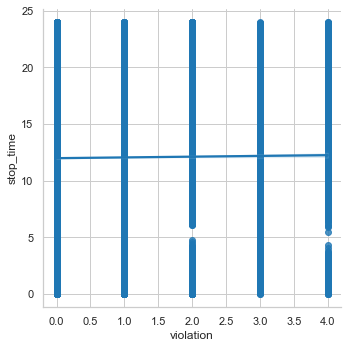

In [118]:
#sns.regplot(x="stop_time", y="violation", data=df)
df_male = df[df['driver_gender'] == 0]
sns.lmplot(x="violation", y="stop_time", data=df_male)

In [ ]:
sns.barplot(data=df_male, x = "violation", y ="stop_time")

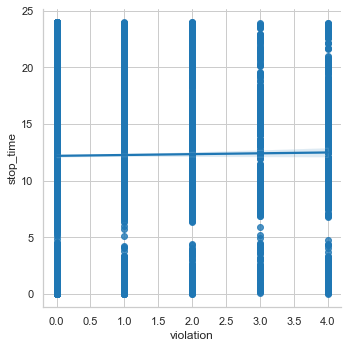

In [119]:
df_female = df[df['driver_gender'] == 1]
sns.lmplot(x="violation", y="stop_time", data=df_female)

In [ ]:
sns.barplot(data=df_male, x = "violation", y ="stop_time")

In [121]:
male_fit = np.polyfit(df_male['stop_time'], df_male['violation'],1)
male_fit

array([0.00184873, 0.70815121])

In [122]:
female_fit = np.polyfit(df_female['stop_time'], df_female['violation'],1)
female_fit

array([0.00196986, 0.4505586 ])

Com os dados obtidos observase uma tendecia infratores 